In [1]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from kneed import KneeLocator
from tqdm.auto import tqdm
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_model = pd.read_csv('C:/Users/USER/Dwi/dataset/datamaster-real.csv')
df_model

,id_student,code_module,gender,disability,final_result,score,assessment_type,activity_type,total_activities,sum_click,total_interaction
0,11391,AAA,M,N,Pass,82.0,TMA,resource,9,16,3555
1,11391,AAA,M,N,Pass,82.0,TMA,resource,9,44,3555
2,11391,AAA,M,N,Pass,82.0,TMA,resource,9,1,3555
3,11391,AAA,M,N,Pass,82.0,TMA,resource,9,2,3555
4,11391,AAA,M,N,Pass,82.0,TMA,resource,9,7,3555
...,...,...,...,...,...,...,...,...,...,...,...
1017958,693273,GGG,M,N,Fail,68.0,TMA,glossary,14,1,378
1017959,693273,GGG,M,N,Fail,68.0,TMA,glossary,14,4,378
1017960,693273,GGG,M,N,Fail,68.0,TMA,glossary,14,2,378
1017961,693273,GGG,M,N,Fail,68.0,TMA,glossary,14,6,378


In [3]:
df_model = df_model.drop('id_student', axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017963 entries, 0 to 1017962
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   code_module        1017963 non-null  object 
 1   gender             1017963 non-null  object 
 2   disability         1017963 non-null  object 
 3   final_result       1017963 non-null  object 
 4   score              1017963 non-null  float64
 5   assessment_type    1017963 non-null  object 
 6   activity_type      1017963 non-null  object 
 7   total_activities   1017963 non-null  int64  
 8   sum_click          1017963 non-null  int64  
 9   total_interaction  1017963 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 77.7+ MB


In [4]:
# Get the position of categorical columns
catColumnsPos = [df_model.columns.get_loc(col) for col in list(df_model.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_model.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['code_module', 'gender', 'disability', 'final_result', 'assessment_type', 'activity_type']
Categorical columns position  : [0, 1, 2, 3, 5, 6]


In [5]:
# Fit the cluster
kprototype = KPrototypes(n_clusters = 3, init = 'Cao', n_jobs = 4, verbose = 2, random_state = 0)
kprototype.fit_predict(df_model, categorical = catColumnsPos)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Best run was number 1


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [6]:
# Cluster centorid
kprototype.cluster_centroids_

array([['60.26631060705234', '22.503719847441676', '15.075732659699176',
        '7785.15473937953', 'DDD', 'M', 'N', 'Fail', 'TMA', 'subpage'],
       ['67.14697669827763', '34.42748049964545', '30.503172784959727',
        '42613.47141636341', 'FFF', 'M', 'N', 'Pass', 'TMA', 'forumng'],
       ['81.090989010989', '35.40923076923077', '66.43384615384615',
        '150995.6465934066', 'FFF', 'M', 'N', 'Pass', 'CMA', 'forumng']],
      dtype='<U32')

In [7]:
# Check the iteration of the clusters created
kprototype.n_iter_

5

In [8]:
# Check the cost of the clusters created
kprototype.cost_

209956000089344.4

In [9]:
# Check the labels of the clusters created
kprototype.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [10]:
# Save Model
pickle.dump(kprototype, open('kproto_model.pkl', 'wb'))

In [11]:
# Add the cluster to the copy of dataframe
df_pred = df_model.copy()
df_pred['cluster'] = kprototype.labels_
df_pred.head()

,code_module,gender,disability,final_result,score,assessment_type,activity_type,total_activities,sum_click,total_interaction,cluster
0,AAA,M,N,Pass,82.0,TMA,resource,9,16,3555,0
1,AAA,M,N,Pass,82.0,TMA,resource,9,44,3555,0
2,AAA,M,N,Pass,82.0,TMA,resource,9,1,3555,0
3,AAA,M,N,Pass,82.0,TMA,resource,9,2,3555,0
4,AAA,M,N,Pass,82.0,TMA,resource,9,7,3555,0


## Visualize Cluster Result

In [12]:
# Display data based on the cluster  
for i in range (0,3):
    print('\nLearning Style Cluster: {}\n'.format(i))
    print(df_pred[df_pred['cluster']== i].head(10))


Learning Style Cluster: 0

  code_module gender disability final_result  score assessment_type  \
0         AAA      M          N         Pass   82.0             TMA   
1         AAA      M          N         Pass   82.0             TMA   
2         AAA      M          N         Pass   82.0             TMA   
3         AAA      M          N         Pass   82.0             TMA   
4         AAA      M          N         Pass   82.0             TMA   
5         AAA      M          N         Pass   82.0             TMA   
6         AAA      M          N         Pass   82.0             TMA   
7         AAA      M          N         Pass   82.0             TMA   
8         AAA      M          N         Pass   82.0             TMA   
9         AAA      M          N         Pass   82.0             TMA   

  activity_type  total_activities  sum_click  total_interaction  cluster  
0      resource                 9         16               3555        0  
1      resource                 9       

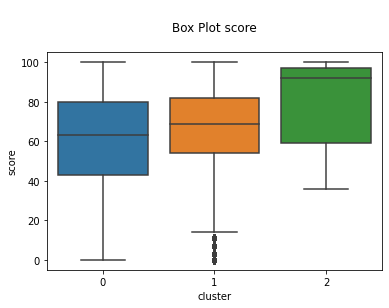

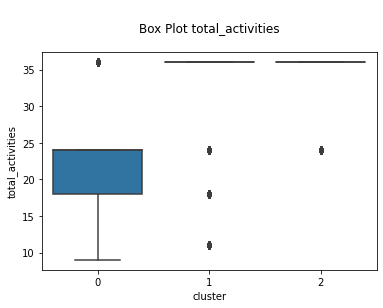

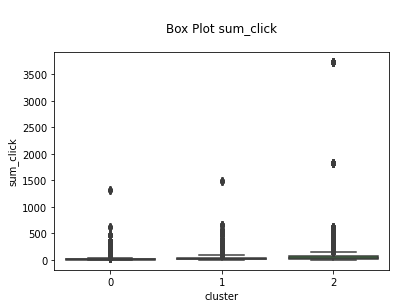

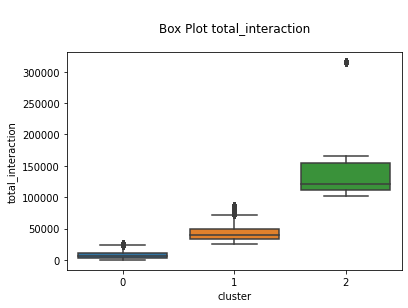

In [13]:
# Data Numerical
kolom_numerik = ['score','total_activities', 'sum_click', 'total_interaction']

for i in kolom_numerik:
    plt.figure(figsize=(6,4))
    ax = sns.boxplot(x = 'cluster', y = i, data = df_pred)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

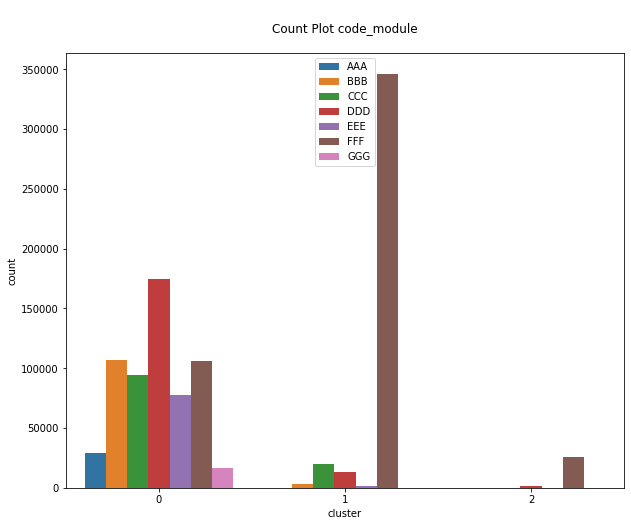

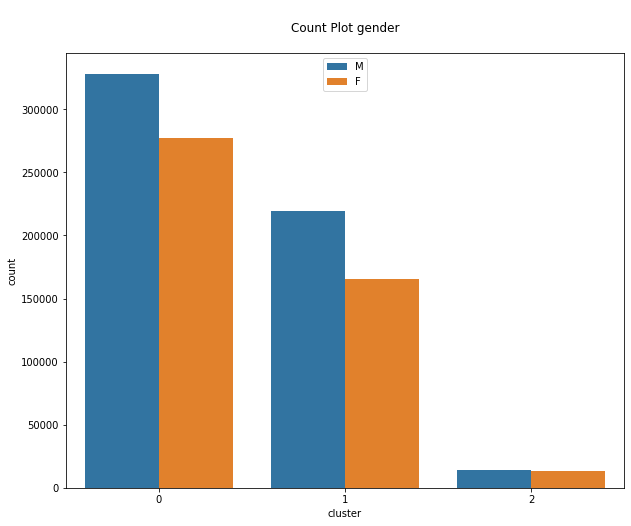

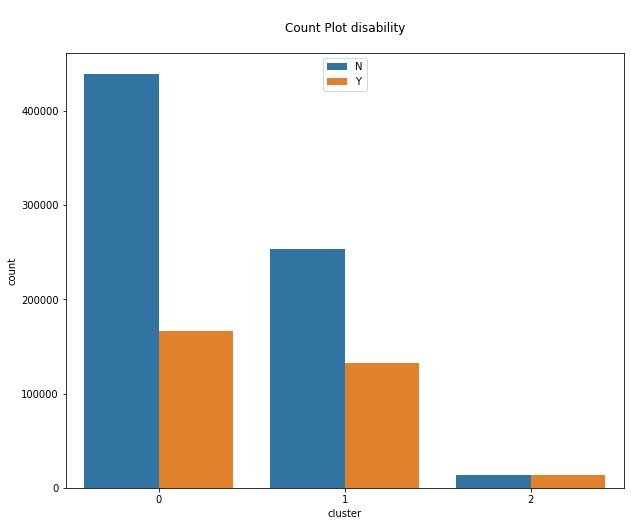

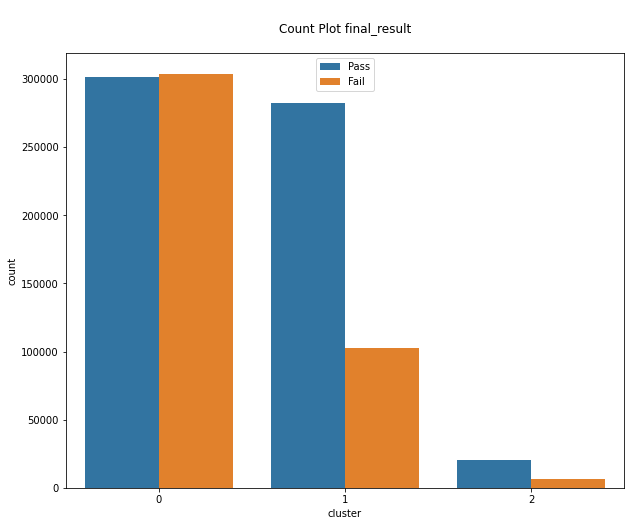

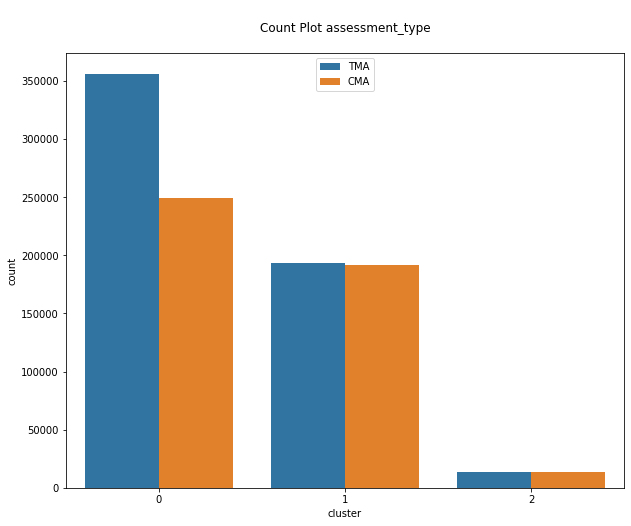

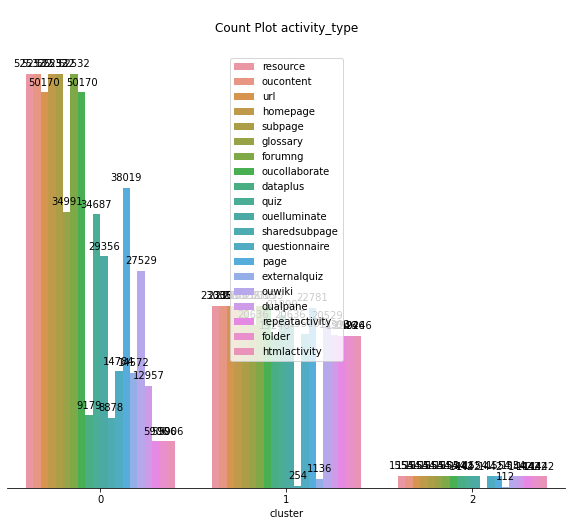

In [14]:
# Data Categorical
kolom_categorical = ['code_module', 'gender', 'disability', 'final_result', 'assessment_type', 'activity_type']

for i in kolom_categorical:
    plt.figure(figsize=(10,8))
    ax = sns.countplot(data = df_pred, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')
    
sns.despine(right = True, top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

In [15]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017963 entries, 0 to 1017962
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   code_module        1017963 non-null  object 
 1   gender             1017963 non-null  object 
 2   disability         1017963 non-null  object 
 3   final_result       1017963 non-null  object 
 4   score              1017963 non-null  float64
 5   assessment_type    1017963 non-null  object 
 6   activity_type      1017963 non-null  object 
 7   total_activities   1017963 non-null  int64  
 8   sum_click          1017963 non-null  int64  
 9   total_interaction  1017963 non-null  int64  
 10  cluster            1017963 non-null  uint16 
dtypes: float64(1), int64(3), object(6), uint16(1)
memory usage: 79.6+ MB


## Mapping Cluster

In [16]:
# Mapping cluster
df_pred['segmen'] = df_pred['cluster'].map({
0: 'visual',
1: 'auditory',
2: 'kinaesthetic'
})

print(df_pred.info())
print(df_pred.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017963 entries, 0 to 1017962
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   code_module        1017963 non-null  object 
 1   gender             1017963 non-null  object 
 2   disability         1017963 non-null  object 
 3   final_result       1017963 non-null  object 
 4   score              1017963 non-null  float64
 5   assessment_type    1017963 non-null  object 
 6   activity_type      1017963 non-null  object 
 7   total_activities   1017963 non-null  int64  
 8   sum_click          1017963 non-null  int64  
 9   total_interaction  1017963 non-null  int64  
 10  cluster            1017963 non-null  uint16 
 11  segmen             1017963 non-null  object 
dtypes: float64(1), int64(3), object(7), uint16(1)
memory usage: 87.4+ MB
None
  code_module gender disability final_result  score assessment_type  \
0         AAA      M          N      

In [19]:
df_pred["cluster"].value_counts()

0    605670
1    384993
2     27300
Name: cluster, dtype: int64

In [24]:
df_pred[df_pred["cluster"] == 0].describe()

,score,total_activities,sum_click,total_interaction,cluster
count,605670.000000,605670.00000,605670.000000,605670.000000,605670.0
mean,60.266311,22.50372,15.075733,7785.154739,0.0
std,24.642271,7.99766,18.339928,6084.414976,0.0
min,0.000000,9.00000,1.000000,14.000000,0.0
25%,43.000000,18.00000,5.000000,3113.000000,0.0
50%,63.000000,24.00000,10.000000,5712.000000,0.0
75%,80.000000,24.00000,19.000000,11160.000000,0.0
max,100.000000,36.00000,1326.000000,24930.000000,0.0


In [25]:
df_pred[df_pred["cluster"] == 1].describe()

,score,total_activities,sum_click,total_interaction,cluster
count,384993.000000,384993.000000,384993.000000,384993.000000,384993.0
mean,67.146977,34.427480,30.503173,42613.471416,1.0
std,19.609185,4.842332,32.008330,12687.344881,0.0
min,0.000000,11.000000,1.000000,25308.000000,1.0
25%,54.000000,36.000000,10.000000,32868.000000,1.0
50%,69.000000,36.000000,22.000000,40176.000000,1.0
75%,82.000000,36.000000,40.000000,48708.000000,1.0
max,100.000000,36.000000,1497.000000,85824.000000,1.0


In [26]:
df_pred[df_pred["cluster"] == 2].describe()

,score,total_activities,sum_click,total_interaction,cluster
count,27300.000000,27300.000000,27300.000000,27300.000000,27300.0
mean,81.090989,35.409231,66.433846,150995.646593,2.0
std,21.447677,2.596241,166.140210,67811.615847,0.0
min,36.000000,24.000000,1.000000,101592.000000,2.0
25%,59.000000,36.000000,16.000000,112068.000000,2.0
50%,92.000000,36.000000,35.000000,121104.000000,2.0
75%,97.000000,36.000000,71.000000,154512.000000,2.0
max,100.000000,36.000000,3725.000000,315036.000000,2.0


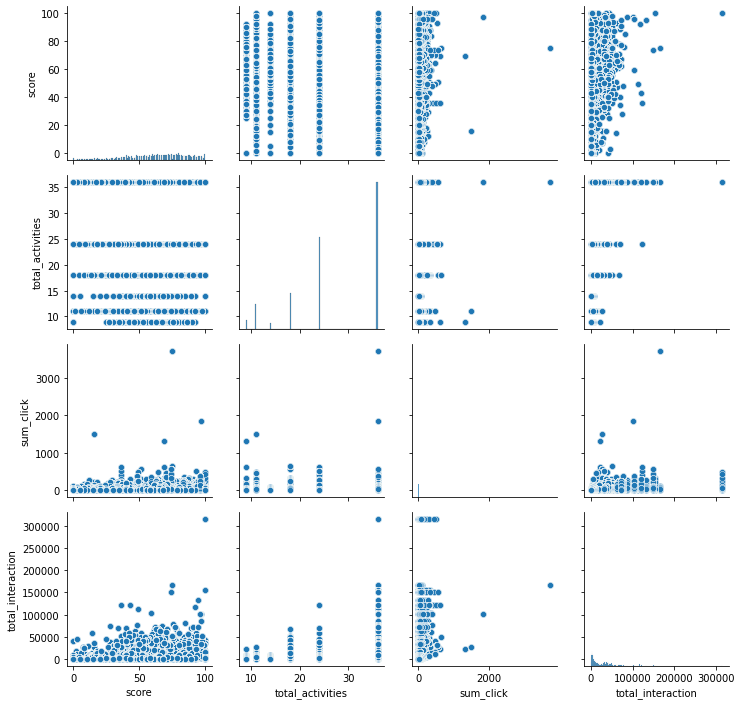

In [23]:
g = sns.PairGrid(df_pred[['score','total_activities', 'sum_click', 'total_interaction']], palette = 'Spectral')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [17]:
df_pred.to_csv('C:/Users/USER/Dwi/dataset/df_pred.csv')

## Predict using New Data 

In [ ]:
# New Data
data = [{
    'code_module': '' ,
    'gender': '' ,
    'disability': '',
    'final_result': ,
    'score': ,
    'assessment_type': '',
    'activity_type': '',
    'total_activities': ,
    'sum_click': ,
    'total_interaction': ,
}]

# Create Dataframe
new_df = pd.DataFrame(data)
print(new_df)

In [ ]:
def modelling(data):

    # Use Model
    kproto = pickle.load(open('kproto_model.pkl', 'rb'))

    # Predict
    clusters = kproto.predict(data,categorical=[0, 1, 2, 3, 5, 6])

    return clusters

# Run Function
clusters = modelling(new_df)

print(clusters)

In [ ]:
def mapping_cluster(real_data, clusters):

    # Merge cluster and real data
    final_df = real_data.copy()
    final_df['cluster'] = clusters

    # Mapping Cluster
    final_df['segmen'] = final_df['cluster'].map({
    0: '',
    1: '',
    2: ''
    })

    return final_df

# Run Functions
new_final_df = mapping_cluster(new_df, clusters)

print(new_final_df)

In [ ]:
# def preprocessing(data):
#     # Conversion Categorical Data
#     catColumns = ['code_module', 'gender', 'disability', 'final_result', 'assessment_type', 'activity_type']

#     df_encode = data[catColumns].copy()

#     ## code_module
#     df_encode['code_module'] = df_encode['code_module'].map({
#     'AAA': 0,
#     'BBB' : 1,
#     'CCC': 2,
#     'DDD' : 3,
#     'EEE': 4,
#     'FFF' : 5,
#     'GGG' : 6
#     })

#     ## gender
#     df_encode['gender'] = df_encode['gender'].map({
#     'M': 1,
#     'F' : 0
#     })

#     ## disability
#     df_encode['disability'] = df_encode['disability'].map({
#     'N': 0,
#     'Y' : 1
#     })

#     ## final_result
#     df_encode['final_result'] = df_encode['final_result'].map({
#     'Pass': 1,
#     'Fail' : 0
#     })

#     ## assessment_type
#     df_encode['assessment_type'] = df_encode['assessment_type'].map({
#     'TMA': 1,
#     'CMA' : 0
#     })

#     ## activity_type
#     df_encode['activity_type'] = df_encode['activity_type'].map({
#     'dataplus': 0,
#     'dualpane': 1,
#     'externalquiz': 2,
#     'folder': 3,
#     'forumng': 4,
#     'glossary': 5,
#     'homepage': 6,
#     'htmlactivity': 7,
#     'oucollaborate': 8,
#     'oucontent': 9,
#     'ouelluminate': 10,
#     'ouwiki': 11,
#     'page': 12,
#     'questionnaire': 13,
#     'quiz': 14,
#     'repeatactivity': 15,
#     'resource': 16,
#     'sharedsubpage': 17,
#     'subpage': 18,
#     'url': 19,
#     })

#     # Standardisasi Numerical Data
#     numColumns = ['score', 'total_activities', 'sum_click', 'total_interaction']
#     df_std = data[numColumns].copy()

#     ## Standardisasi Kolom Umur
#     df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7

#     ## Standardisasi Kolom Nilai Belanja Setahun
#     df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0

#     # Menggabungkan Kategorikal dan numerikal data
#     df_final = df_encode.merge(df_std, left_index = True,
#     right_index=True, how = 'left')

#     return df_final

# # Menjalankan fungsi
# new_df_final = preprocessing(new_df)

# print(new_df_final)